## Gala Groceries EDA

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_csv("sample_sales_data.csv")
print('Shape: ', df.shape)
df.head()

Shape:  (7829, 10)


,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


| Column Name    | Description                                                  |
|-----------------|--------------------------------------------------------------|
| transaction_id  | Unique ID assigned to each transaction                       |
| timestamp       | Datetime at which the transaction was made                   |
| product_id      | ID assigned to the product that was sold (unique for each product) |
| category        | Category that the product is contained within                |
| customer_type   | Type of customer that made the transaction                   |
| unit_price      | Price that 1 unit of this item sells for                     |
| quantity        | Number of units sold for this product within this transaction |
| total           | Total amount payable by the customer                          |
| payment_type    | Payment method used by the customer                           |


### EDA

In [3]:
df.info()  # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [4]:
for col in ['transaction_id','product_id']:
    print(col,': ',df[col].nunique())

transaction_id :  7829
product_id :  300


In [5]:
df.drop(columns=["Unnamed: 0","transaction_id","product_id"], axis = 1, inplace=True,)  # Drop unnecessary columns
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')  # Convert 'timestamp' to datetime
df['hour'] = df['timestamp'].dt.hour  # Extract hour from 'timestamp' and create a new column 'hour'
df.isnull().sum()  # Check for missing values

timestamp        0
category         0
customer_type    0
unit_price       0
quantity         0
total            0
payment_type     0
hour             0
dtype: int64

In [6]:
df[df.duplicated()]  # Check for duplicate rows

,timestamp,category,customer_type,unit_price,quantity,total,payment_type,hour


In [7]:
df.describe()  # Descriptive statistics of the dataset

,timestamp,unit_price,quantity,total,hour
count,7829,7829.000000,7829.000000,7829.000000,7829.000000
mean,2022-03-04 13:41:47.803550976,7.819480,2.501597,19.709905,13.980585
min,2022-03-01 09:00:13,0.190000,1.000000,0.190000,9.000000
25%,2022-03-02 16:31:31,3.990000,1.000000,6.570000,11.000000
50%,2022-03-04 14:03:33,7.190000,3.000000,14.970000,14.000000
75%,2022-03-06 11:34:45,11.190000,4.000000,28.470000,17.000000
max,2022-03-07 19:59:54,23.990000,4.000000,95.960000,19.000000
std,NaN,5.388088,1.122722,17.446680,3.176205


**Inference**  
1. **Average unit price** of grocery items is approximately **\\$7.82**.  
2. **Average customers purchase** around **2.5 items per transaction**.  
3. **Average total transaction amount** is approximately **\\$19.71**.
4. **Peak sales** typically happen **around 2:00 PM**.  

In [8]:
def count_analysis(data: pd.DataFrame = None, y: str = None, make_percentage=False, top_n=None, plot=True, Print=False, sort_index=False, figsize=(10, 8), palette='viridis',  **kwargs):
    plt.figure(figsize=figsize)
    counts = data[y].value_counts()
    if make_percentage: counts = counts / counts.sum() * 100
    counts = counts.sort_values(ascending=False) if not sort_index else counts.sort_index()
    counts = counts.head(top_n)
    if Print: print(counts)
    if plot:
        ax = sns.barplot(x=counts.values, y=counts.index, order=counts.index, orient='h', palette=palette, **kwargs)
        ax.set(title=f"{'Percentage of' if make_percentage else ''} {counts.name} of {counts.index.name}")
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f %%' if make_percentage else '%.0f')
        plt.show()

def group_analysis(data: pd.DataFrame = None, groupby:list =None, groupto=None, func='sum', make_percentage=False, plot=True, Print=False, sort_index=False, figsize=(15, 8), palette='viridis', **kwargs):
    category_value = df.groupby(groupby)[groupto].apply(func)
    if make_percentage: category_value = (category_value / category_value.sum()) * 100
    category_value = category_value.sort_values(ascending=False) if not sort_index else category_value.sort_index()
    if Print: print(category_value)
    if plot:
        plt.figure(figsize=figsize)
        ax = sns.barplot(x=category_value.values, y=category_value.index, orient='h', palette=palette, **kwargs)
        ax.set(title=f"{'Percentage of' if make_percentage else ''} {func} of {category_value.name} by {category_value.index.name}")
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f %%' if make_percentage else '%.2f')
        plt.show()

In [9]:
df.nunique()

timestamp        7738
category           22
customer_type       5
unit_price         64
quantity            4
total             256
payment_type        4
hour               11
dtype: int64

#### **Shopping Time**

In [10]:
df.timestamp.max()-df.timestamp.min()

Timedelta('6 days 10:59:41')

**Inference**
- The **grocery sales data spans** approximately **6 days and 11 hours**.

In [11]:
df.hour.nunique()

11

hour
9     9.171031
10    9.234896
11    9.426491
12    9.209350
13    8.851705
14    8.966662
15    8.545153
16    9.324307
17    8.928343
18    9.285988
19    9.056074
Name: count, dtype: float64


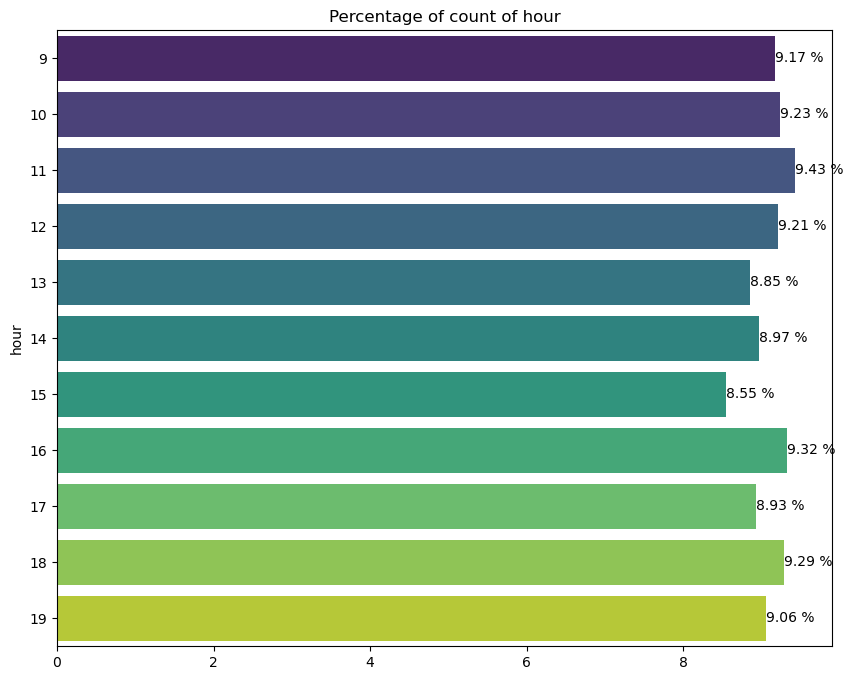

In [12]:
count_analysis(df,'hour', make_percentage=True, Print=True, sort_index=True)

hour
9     13904.25
10    13346.56
11    14997.63
12    14359.87
13    13590.22
14    13759.12
15    13563.79
16    14475.48
17    14010.43
18    14347.75
19    13953.75
Name: total, dtype: float64


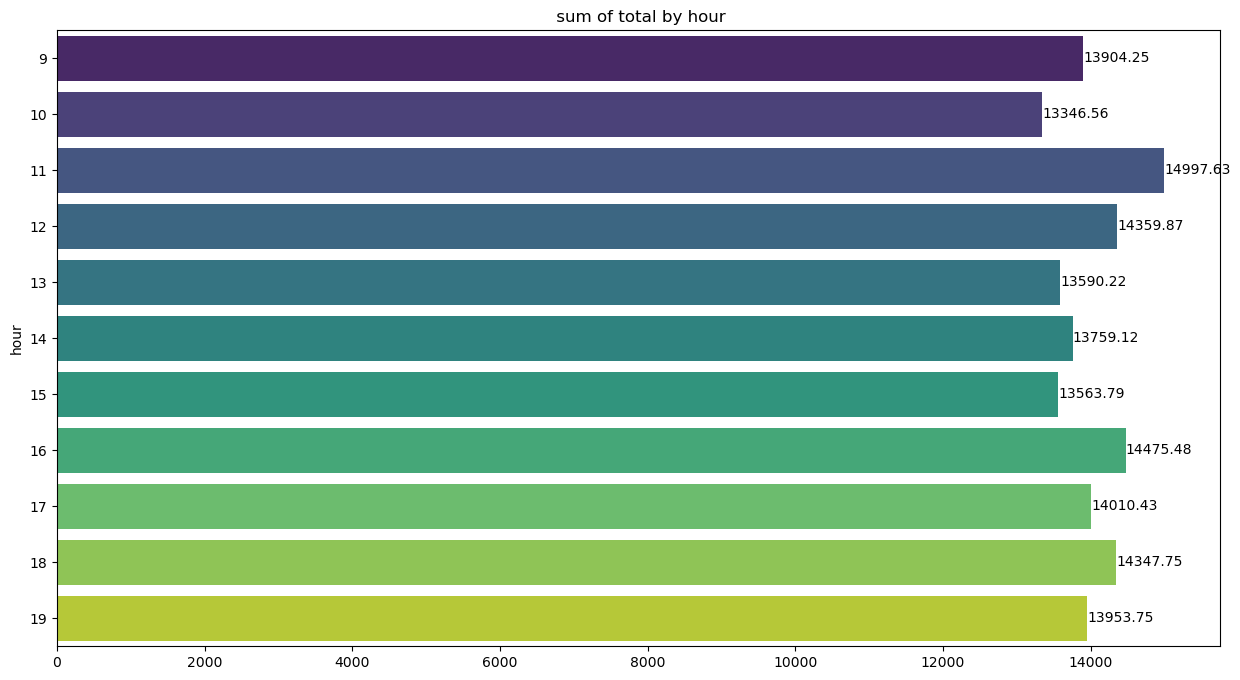

In [13]:
group_analysis(df, ['hour'], 'total', Print=True, sort_index=True)

hour
9     7.780111
10    7.680456
11    7.722520
12    7.862399
13    7.777879
14    7.737436
15    7.882377
16    7.929726
17    7.870401
18    7.916685
19    7.857560
Name: unit_price, dtype: float64


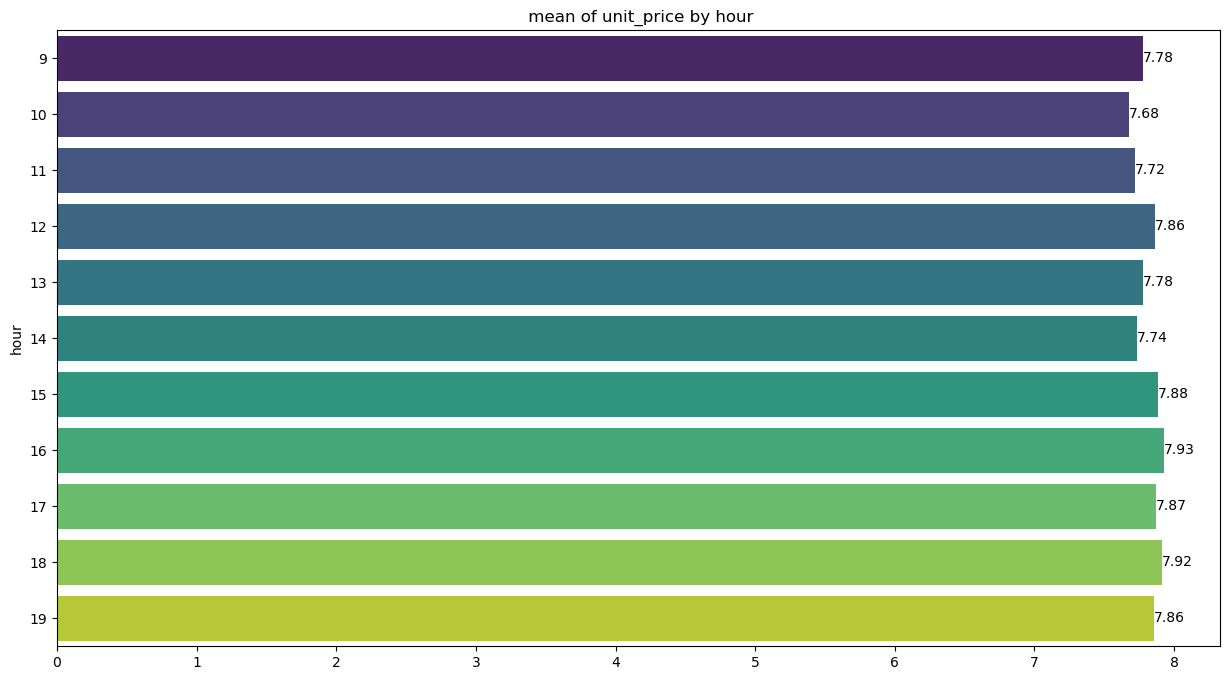

In [14]:
group_analysis(df, ['hour'], 'unit_price', func='mean', Print=True, sort_index=True)

**Inference**

1. **Peak Hours**: The store sees the **highest percentage of transactions** around **11 AM** and **4 PM**. This could be the best time to ensure **adequate staffing** and **fast checkouts**.
2. **Sales Distribution**: The **total sales** are fairly evenly distributed throughout the day, with a slight increase around **11 AM** and **4 PM**, aligning with the peak transaction times.
3. **Pricing Strategy**: The **average unit price** of items sold doesn't vary significantly throughout the day. If the store is looking to **increase revenue**, they could consider **time-based pricing strategies**.
4. **Customer Behavior**: Customers tend to **buy more** during the early and late afternoon. Understanding why this happens could help in planning **store layouts** or **promotions**. 

#### **Product Category**

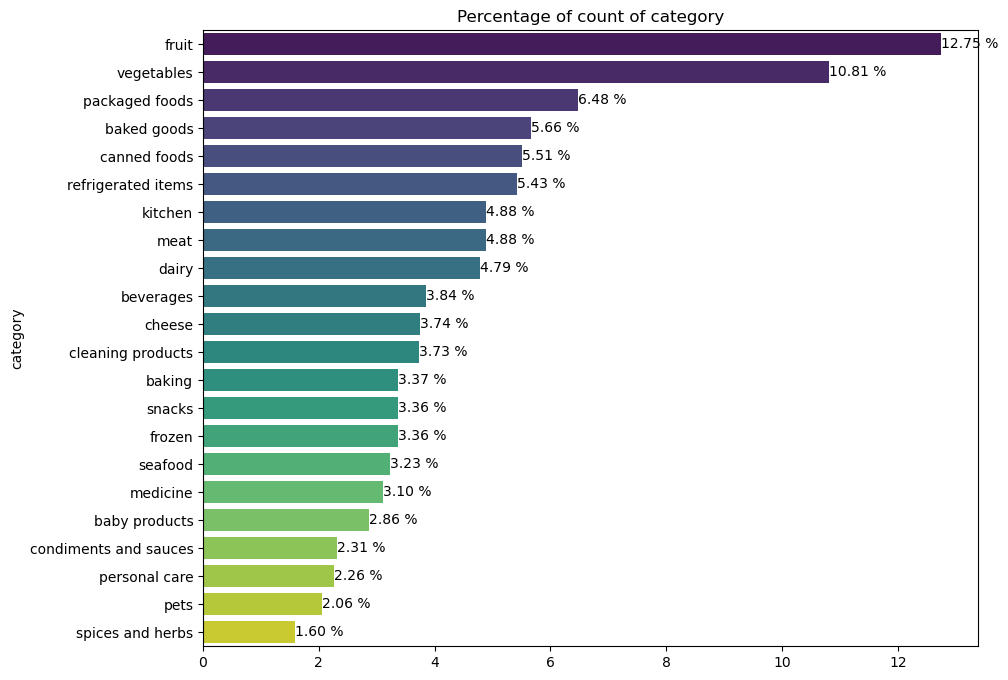

In [15]:
count_analysis(df, y='category', make_percentage=True, plot=True, Print=False)

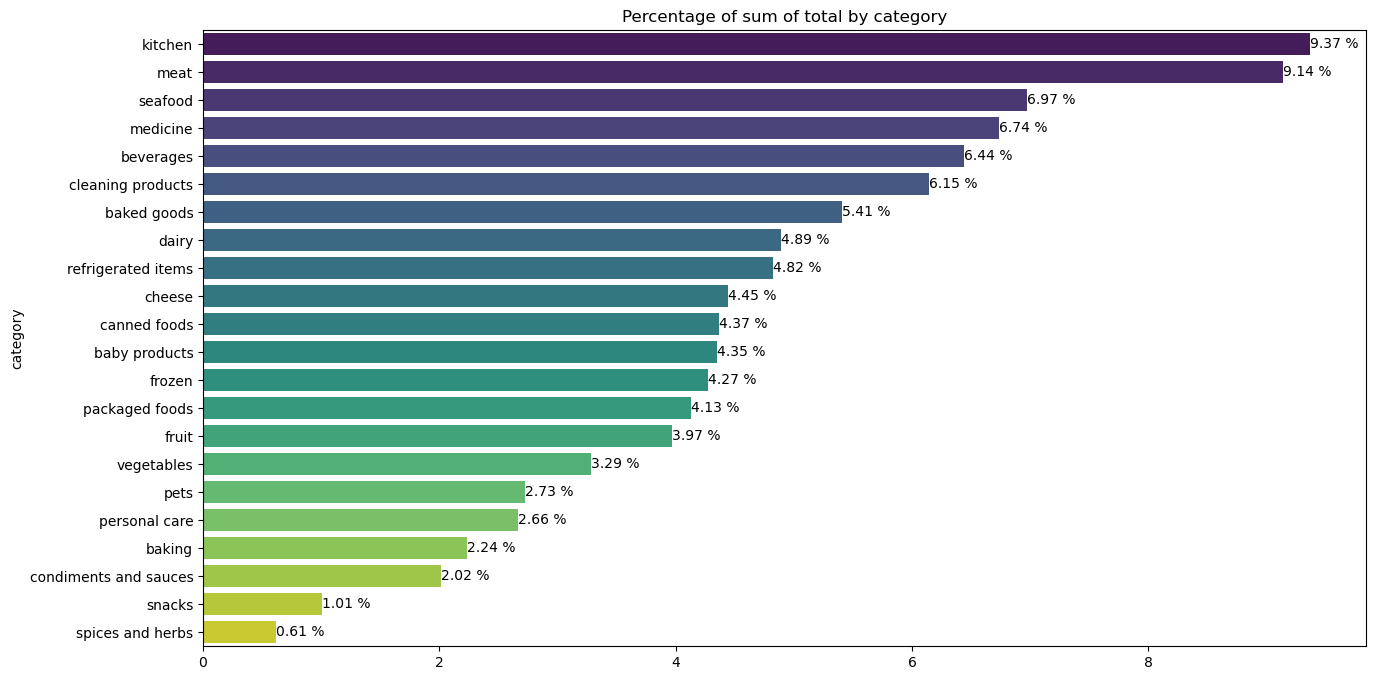

In [16]:
group_analysis(df, ['category'], 'total', func='sum', make_percentage=True, plot=True, Print=False)

**Inference**:

1. **Kitchen** and **meat** categories contribute the most to the total sales, accounting for approximately **9.37%** and **9.14%** respectively.
2. **Fruit** and **vegetables** are the most frequently purchased categories, making up **12.75%** and **10.81%** of the total purchases respectively.
3. Despite being frequently purchased, **fruit** and **vegetables** contribute relatively less to the total sales, at about **3.97%** and **3.29%** respectively.
4. The **spices and herbs** category contributes the least to the total sales, at only about **0.61%**.
5. The **spices and herbs** category is also the least frequently purchased, making up only about **1.60%** of the total purchases.

#### **Unit Price**

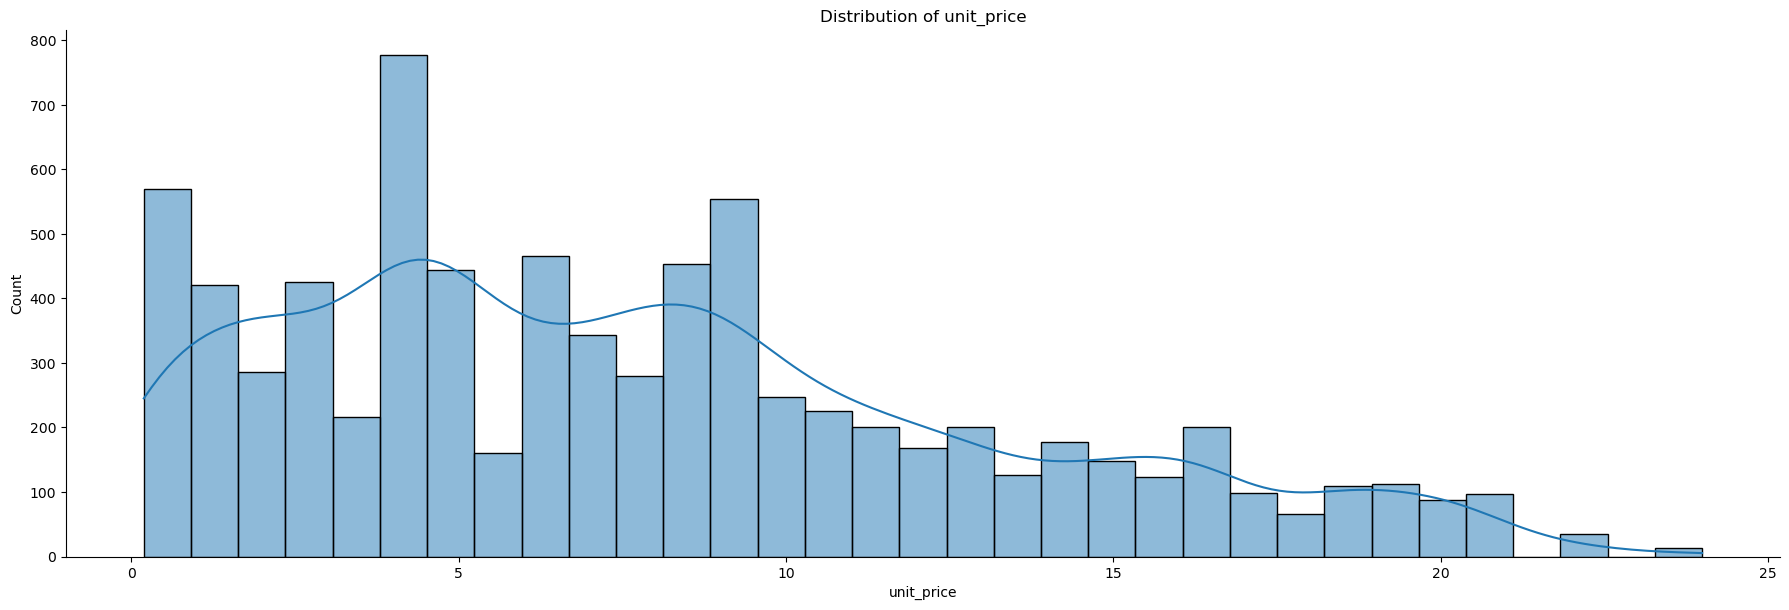

In [17]:
sns.displot(df, x='unit_price', kde=True, height=6, aspect=3,).set(title="Distribution of unit_price");

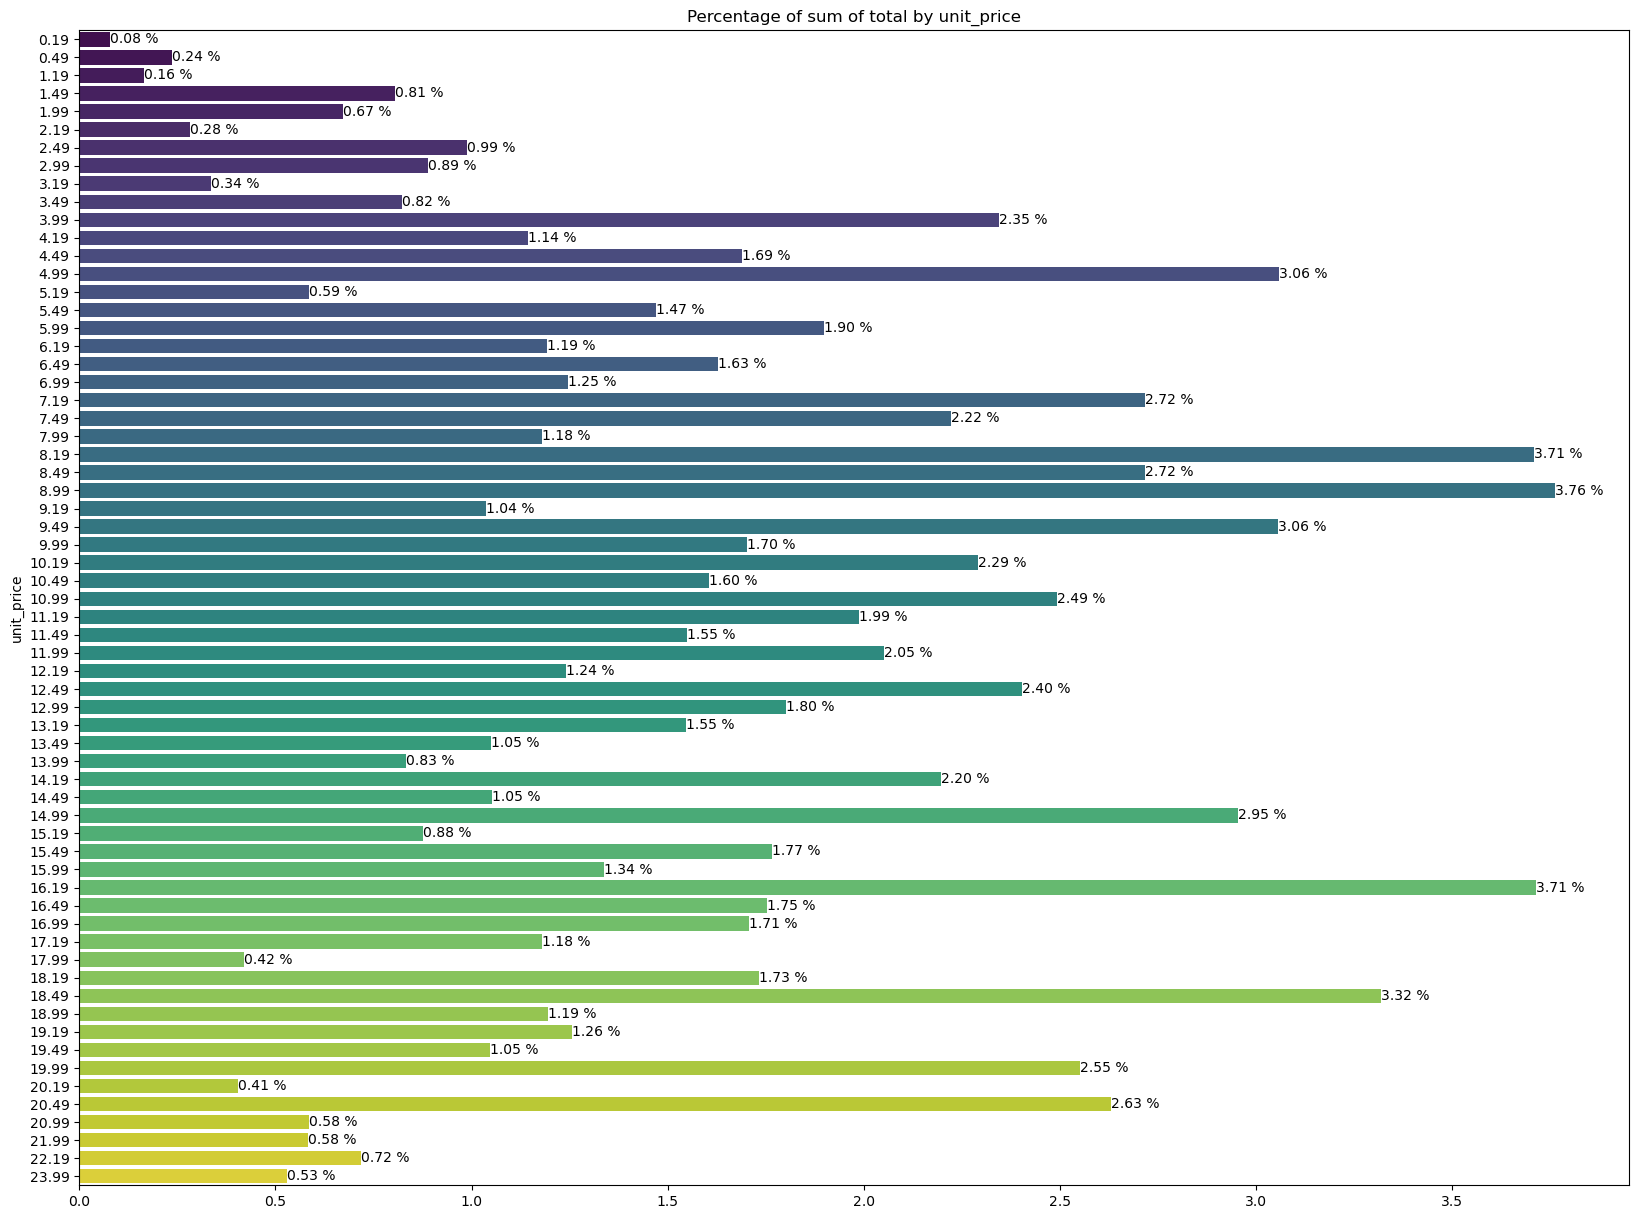

In [18]:
group_analysis(df, ['unit_price'], 'total', func='sum', make_percentage=True, figsize=(20,15))

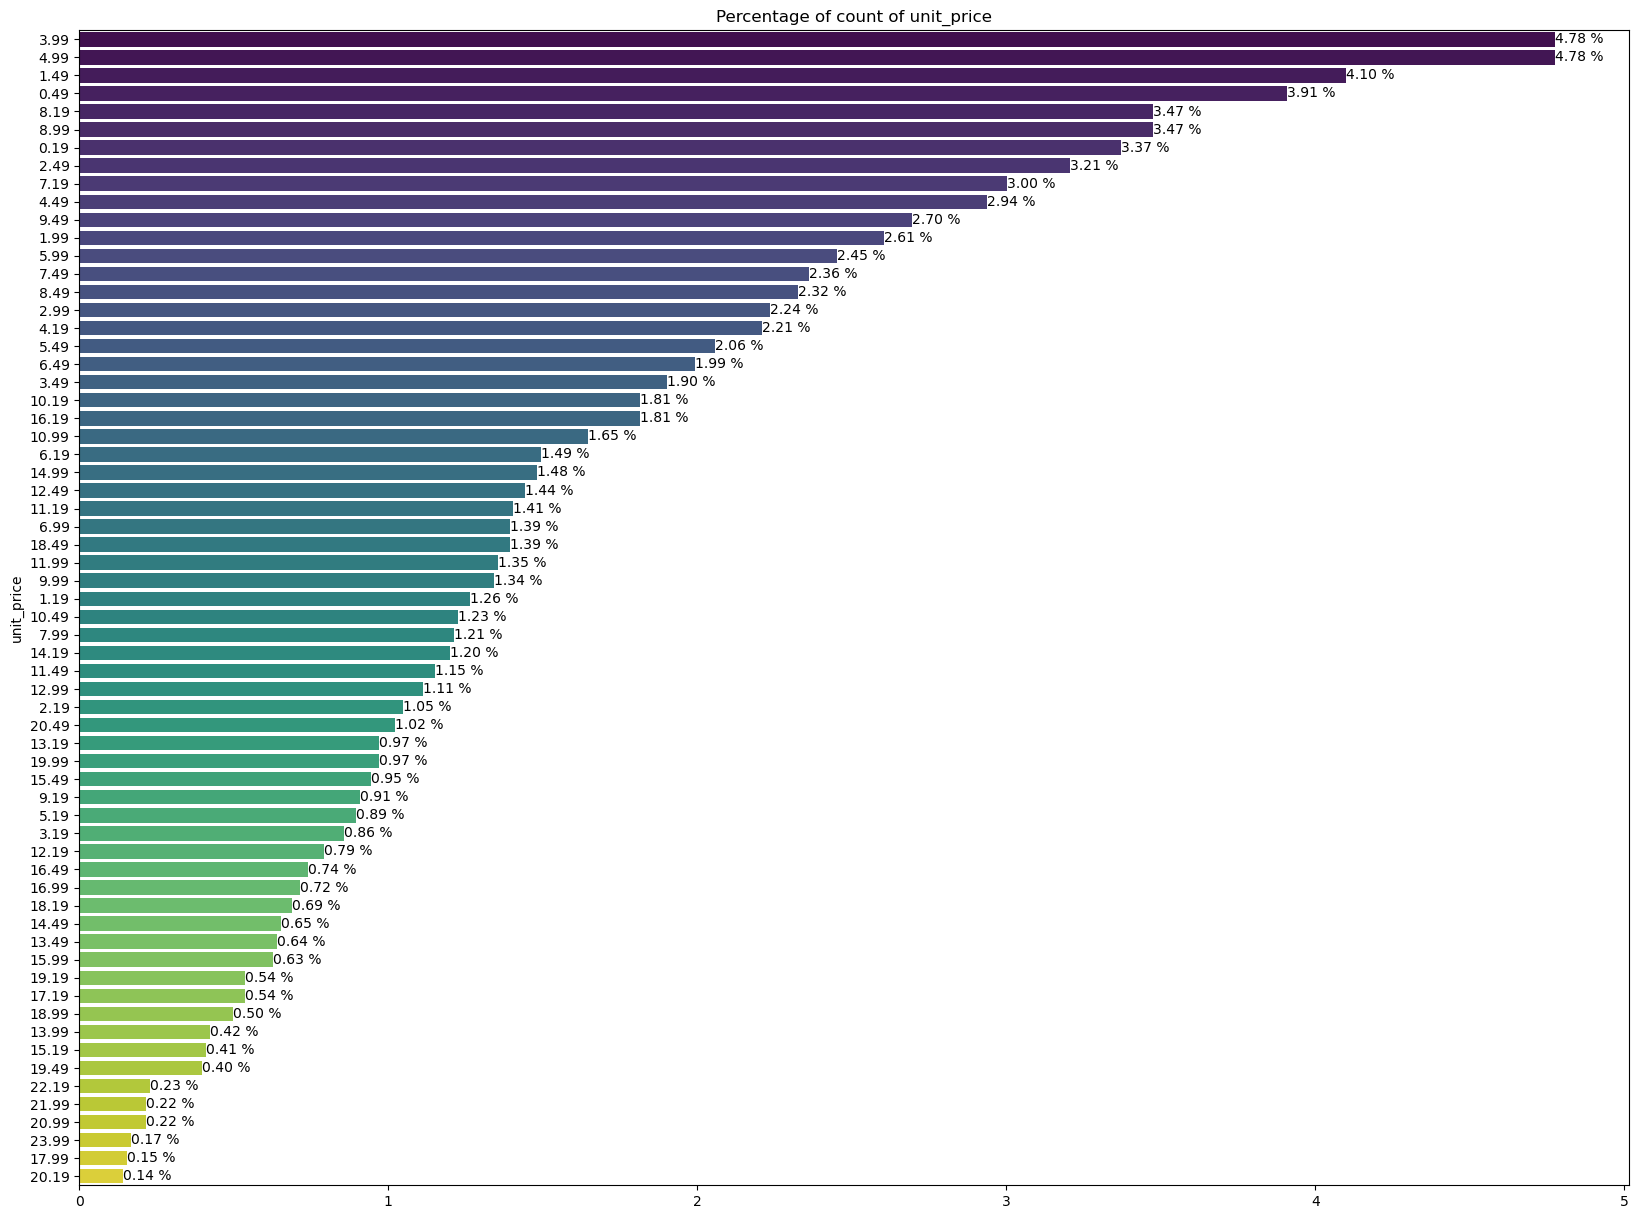

In [19]:
count_analysis(df,y='unit_price', make_percentage=True, figsize=(20,15))

**Inference**:

1. The distribution is **right-skewed** with **3.99 and 4.99** as the most common unit prices, but contribute less to total sales.
2. **Unit price 8.99** contributes the most to total sales (**3.76%**).
3. **Unit price 16.19** also significantly contributes to total sales (**3.71%**).
4. **Unit price 0.19** items are frequently purchased but contribute minimally to sales.
5. **Unit price 23.99** items contribute the least to total sales (**0.53%**).
6. These price points may reflect common pricing strategies or customer preferences.

#### **No. of Units sold**

In [20]:
df.quantity.value_counts()

quantity
1    1979
4    1976
3    1954
2    1920
Name: count, dtype: int64

**Inference**  
The quantity sold is balanced across different units, with each quantity level occurring approximately equally.

#### **Total Amount**

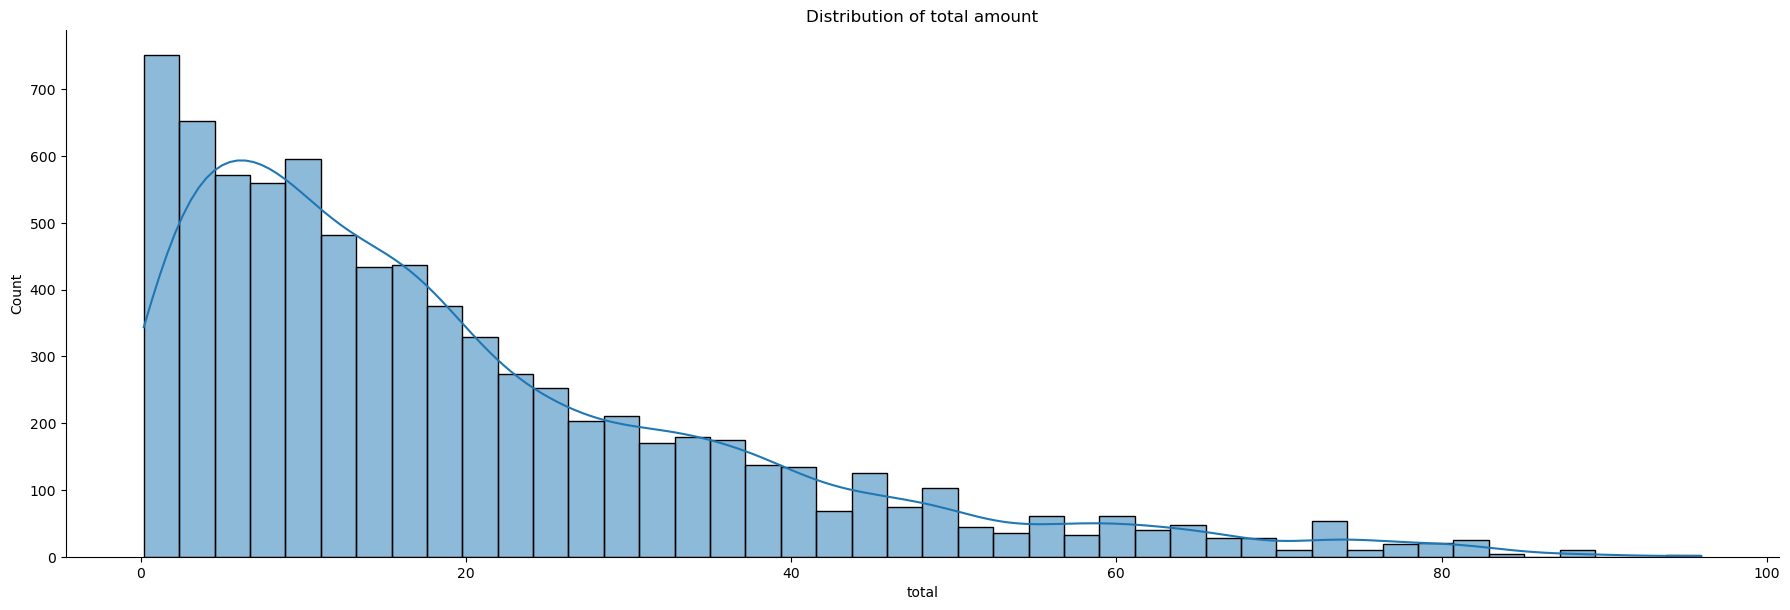

In [21]:
sns.displot(df, x='total', kde=True, height=6, aspect=3,).set(title="Distribution of total amount");

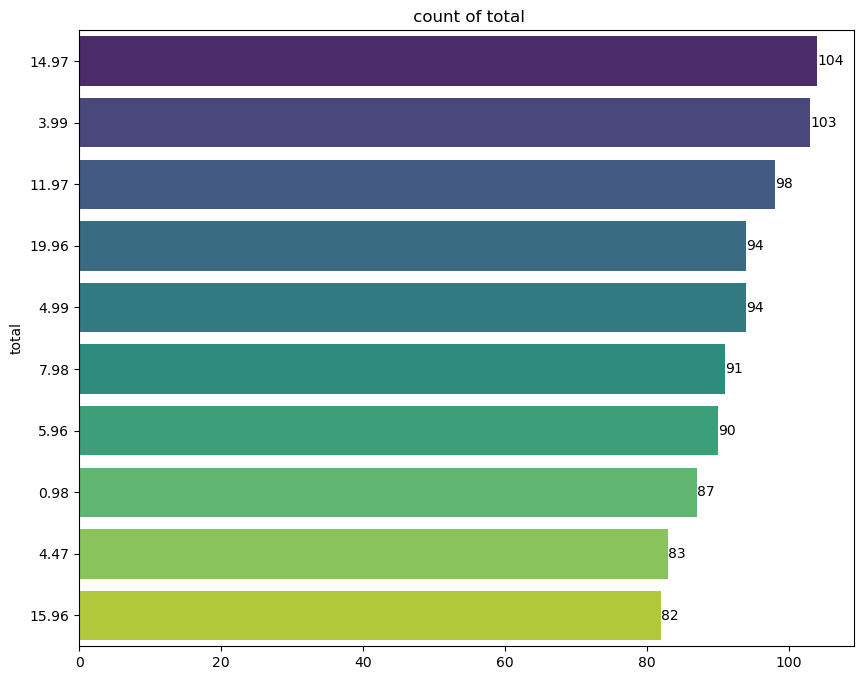

In [22]:
count_analysis(df,y='total', top_n=10)

**Inference**
1. The **most frequent total amount** payable by customers is **\\$14.97**, followed by **\\$3.99** and **\\$11.97**, suggesting these amounts are popular in grocery sales.
2. The inference suggests an **inverse relationship** between the total purchase amount and the count of customers.
3. As the total purchase amount **increases**, the count of customers **decreases**.
4. This implies that a **larger proportion of customers** make purchases of **smaller total amounts**.
5. Conversely, **fewer customers** make purchases of **larger total amounts**.

This analysis suggests that most customers tend to make smaller purchases, while larger purchases are less common.

#### **Type of Customer**

customer_type
non-member    20.449610
standard      20.372972
premium       20.309107
basic         19.491634
gold          19.376676
Name: count, dtype: float64


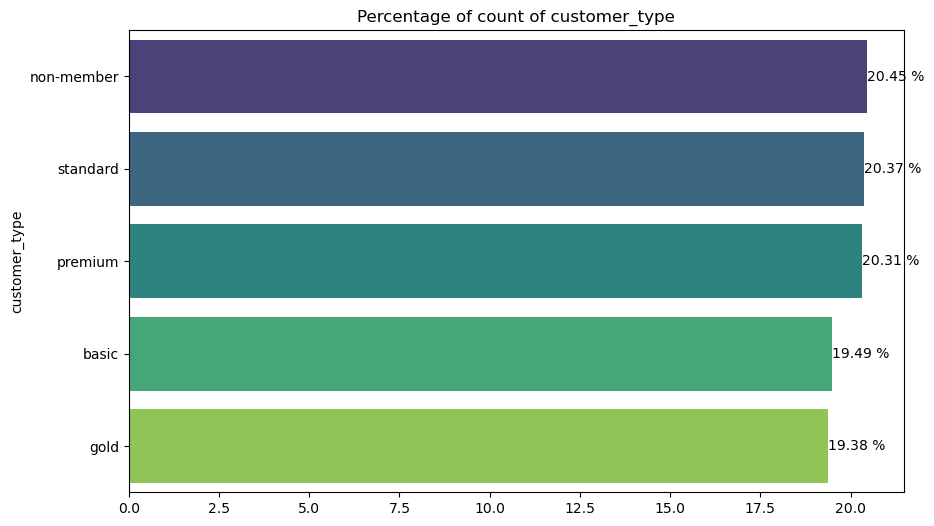

In [23]:
count_analysis(df, 'customer_type', make_percentage=True, Print=True, figsize=(10,6))

customer_type
non-member    31755.24
premium       31655.68
standard      31388.78
gold          29939.99
basic         29569.16
Name: total, dtype: float64


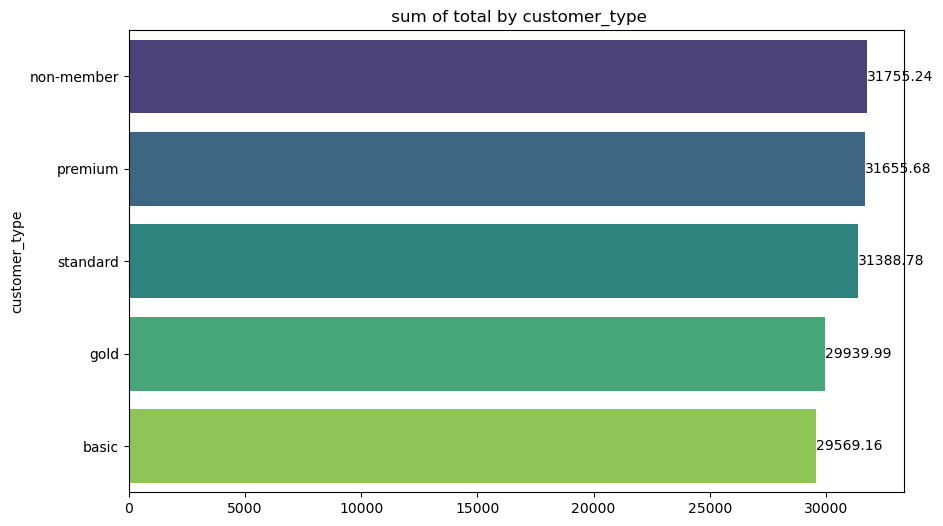

In [24]:
group_analysis(df, ['customer_type'], 'total', func='sum', Print=True, figsize=(10,6))

customer_type
gold          7.888484
non-member    7.877071
basic         7.820079
premium       7.804654
standard      7.710251
Name: unit_price, dtype: float64


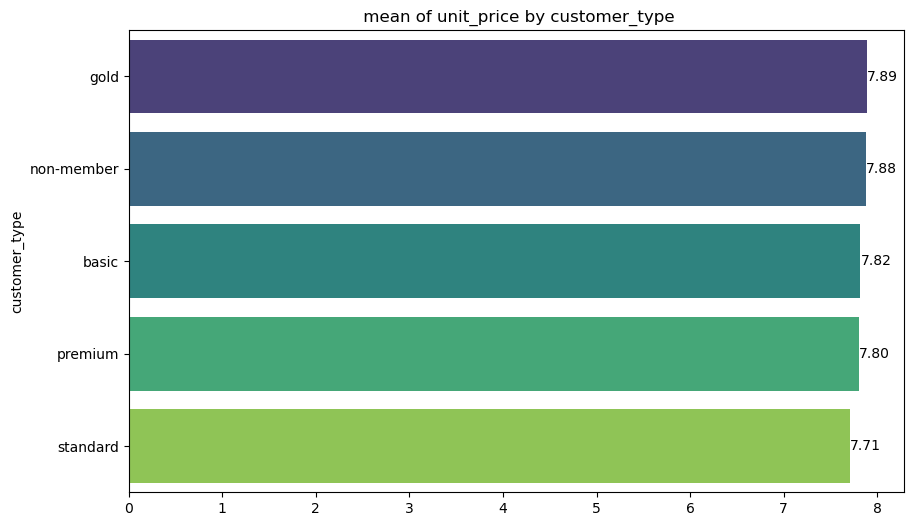

In [25]:
group_analysis(df, ['customer_type'], 'unit_price', func='mean', Print=True, figsize=(10,6))

**Inference :-**
1. **Customer Types**: Balanced, with **non-members**, **standard**, and **premium** being most common.
2. **Gold Customers**: Fewer in number, but prefer **higher-priced items**.
3. **Non-member Spending**: Highest total sales at **\$31,755.24**

#### **Type of Payment**

payment_type
cash           25.890918
credit card    24.894623
e-wallet       24.715800
debit card     24.498659
Name: count, dtype: float64


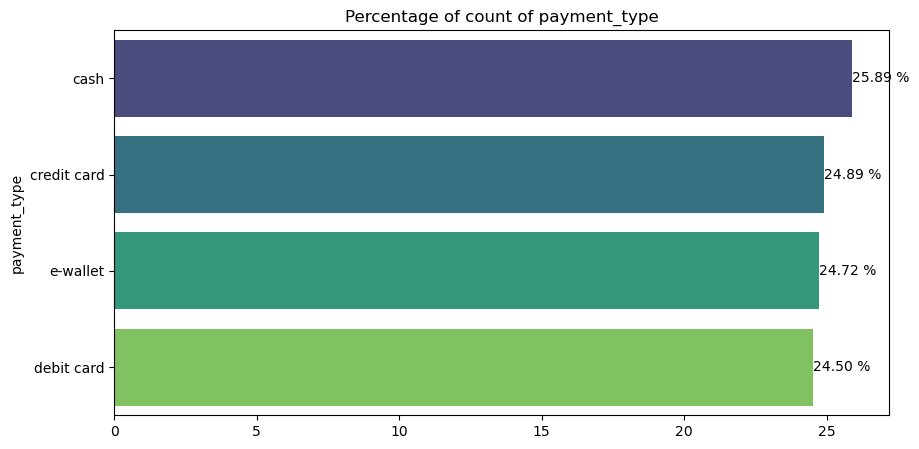

In [26]:
count_analysis(df,y='payment_type', make_percentage=True, Print=True, figsize=(10,5))

payment_type
cash           26.756281
credit card    25.474573
debit card     23.984801
e-wallet       23.784345
Name: total, dtype: float64


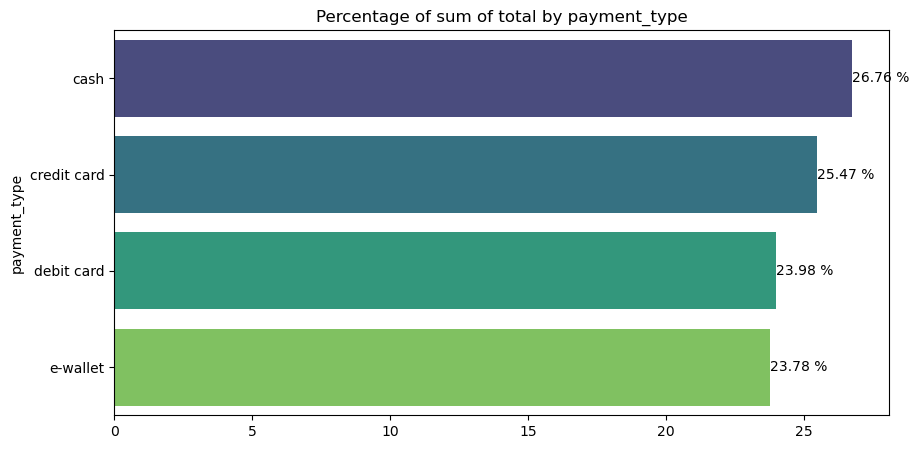

In [27]:
group_analysis(df, groupby=['payment_type'],groupto='total', make_percentage=True, func='sum', Print=True, figsize=(10,5))

payment_type
credit card    8.018579
cash           7.900952
e-wallet       7.770155
debit card     7.580824
Name: unit_price, dtype: float64


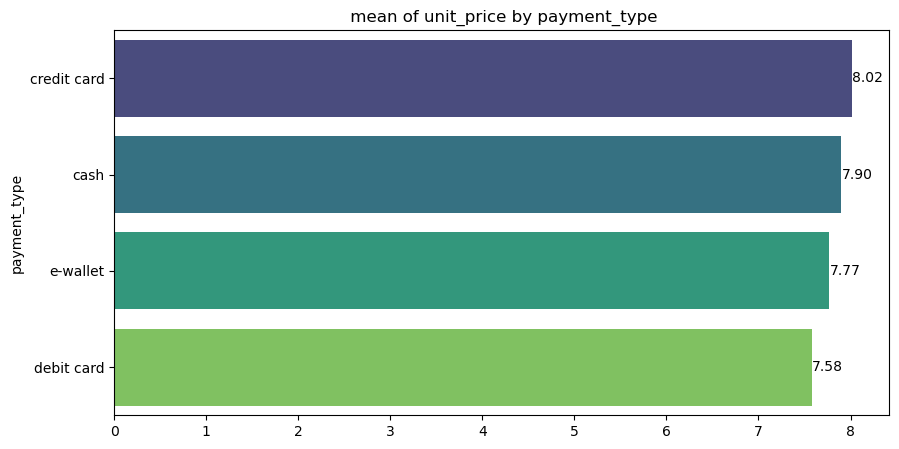

In [28]:
group_analysis(df, groupby=['payment_type'],groupto='unit_price',func='mean', Print=True, figsize=(10,5))

**Inference**
1. **Payment Types**: Transactions are mostly made in **cash**, followed by **credit card**, **e-wallet**, and **debit card**.

2. **Total Sales**: Highest sales are observed with **cash** payments, then **credit card**, **debit card**, and **e-wallet**.

3. **Unit Price**: The highest average unit price is seen in transactions made with a **credit card**, then **cash**, **e-wallet**, and **debit card**.  
   This suggests customers buying more expensive items tend to pay with credit cards or cash.


#### **Correlation**

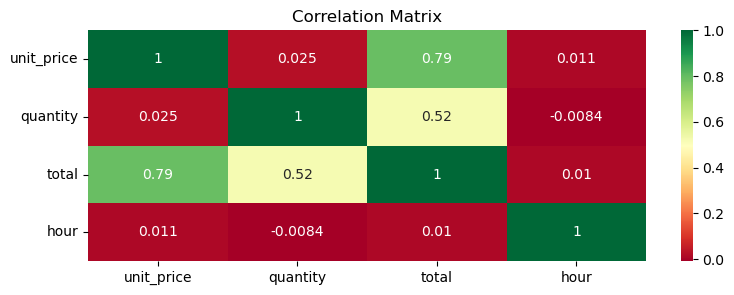

In [29]:
# Heatmap of the correlation matrix
plt.figure(figsize=(9, 3)); sns.heatmap(df.corr(numeric_only=True),annot=True, cmap = "RdYlGn"); plt.title('Correlation Matrix');

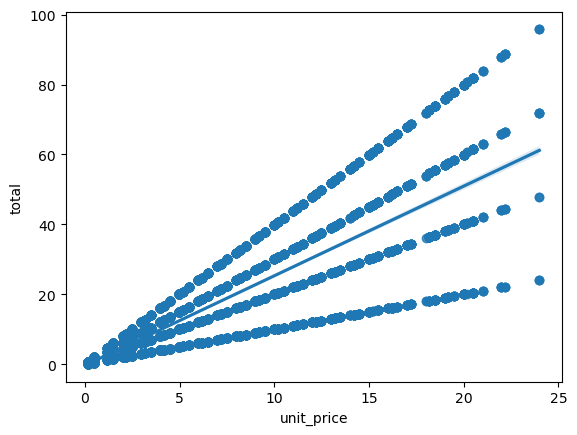

In [30]:
sns.regplot(x=df.unit_price,y=df.total);

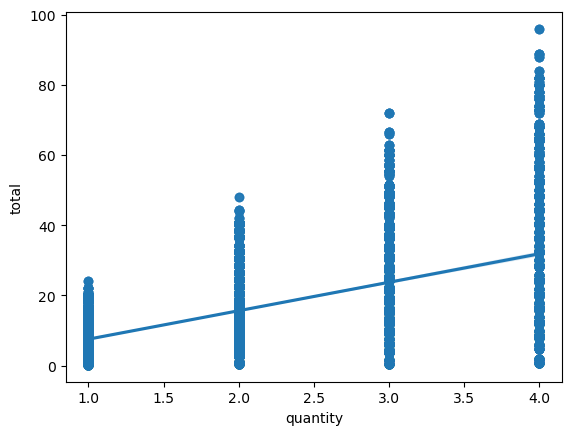

In [31]:
sns.regplot(x=df.quantity,y=df.total);

**Inference**
1. There is a **strong positive correlation** between **unit price** and **total sales**, indicating that higher unit prices lead to higher total sales.
2. There is a **moderate positive correlation** between **quantity** and **total sales**, suggesting that higher quantities sold also contribute to higher total sales.
3. There is **no significant correlation** between the **hour of the day** and any of the other variables.

These insights suggest relationships between unit price, quantity, total sales, and the time of purchase.   
Please note that correlation does not imply causation.